In [67]:
# install.packages("reshape2")
library(reshape2)
# install.packages("colorspace")
library(colorspace)
# install.packages("corrplot")
library(corrplot)
# install.packages("exactRankTests")
library(exactRankTests)

In [68]:
setwd("/Users/rintaromatsushita/Desktop/connectivity_analysis_jupyternote/data/con_NEW/")

N = 17
IDs_exp = c('01_short', '02_short', '03_short', '04_short', '05_short', '06_short', '07_short', '08_short', '09_short', '10_short', '11_short', '12_short', '13_short', '14_short', '15_short', '16_short', '17_short')

S1 = "_S1"
BAS = "_Nbas"

p_threshold = 0.01

In [69]:
S1_theta000_exp = array(0, dim=c(62, 62, N))
S1_theta200_exp = array(0, dim=c(62, 62, N))
S1_theta400_exp = array(0, dim=c(62, 62, N))
S1_theta600_exp = array(0, dim=c(62, 62, N))
S1_theta800_exp = array(0, dim=c(62, 62, N))
BAS_theta000_exp = array(0, dim=c(62, 62, N))

S1_alpha000_exp = array(0, dim=c(62, 62, N))
S1_alpha200_exp = array(0, dim=c(62, 62, N))
S1_alpha400_exp = array(0, dim=c(62, 62, N))
S1_alpha600_exp = array(0, dim=c(62, 62, N))
S1_alpha800_exp = array(0, dim=c(62, 62, N))
BAS_alpha000_exp = array(0, dim=c(62, 62, N))

S1_beta000_exp = array(0, dim=c(62, 62, N))
S1_beta200_exp = array(0, dim=c(62, 62, N))
S1_beta400_exp = array(0, dim=c(62, 62, N))
S1_beta600_exp = array(0, dim=c(62, 62, N))
S1_beta800_exp = array(0, dim=c(62, 62, N))
BAS_beta000_exp = array(0, dim=c(62, 62, N))

In [70]:
for(i in 1:N){
    S1_theta000_exp[,,i] = as.matrix(read.csv(paste( IDs_exp[i], S1, "_theta000-con.csv", sep=""), header=F))
    S1_theta200_exp[,,i] = as.matrix(read.csv(paste( IDs_exp[i], S1, "_theta200-con.csv", sep=""), header=F))
    S1_theta400_exp[,,i] = as.matrix(read.csv(paste( IDs_exp[i], S1, "_theta400-con.csv", sep=""), header=F))
    S1_theta600_exp[,,i] = as.matrix(read.csv(paste( IDs_exp[i], S1, "_theta600-con.csv", sep=""), header=F))
    S1_theta800_exp[,,i] = as.matrix(read.csv(paste( IDs_exp[i], S1, "_theta800-con.csv", sep=""), header=F))
    BAS_theta000_exp[,,i] = as.matrix(read.csv(paste( IDs_exp[i], BAS, "_theta000-con.csv", sep=""), header=F))
    
    S1_alpha000_exp[,,i] = as.matrix(read.csv(paste( IDs_exp[i], S1, "_alpha000-con.csv", sep=""), header=F))
    S1_alpha200_exp[,,i] = as.matrix(read.csv(paste( IDs_exp[i], S1, "_alpha200-con.csv", sep=""), header=F))
    S1_alpha400_exp[,,i] = as.matrix(read.csv(paste( IDs_exp[i], S1, "_alpha400-con.csv", sep=""), header=F))
    S1_alpha600_exp[,,i] = as.matrix(read.csv(paste( IDs_exp[i], S1, "_alpha600-con.csv", sep=""), header=F))
    S1_alpha800_exp[,,i] = as.matrix(read.csv(paste( IDs_exp[i], S1, "_alpha800-con.csv", sep=""), header=F))
    BAS_alpha000_exp[,,i] = as.matrix(read.csv(paste( IDs_exp[i], BAS, "_alpha000-con.csv", sep=""), header=F))

    S1_beta000_exp[,,i] = as.matrix(read.csv(paste( IDs_exp[i], S1, "_beta000-con.csv", sep=""), header=F))
    S1_beta200_exp[,,i] = as.matrix(read.csv(paste( IDs_exp[i], S1, "_beta200-con.csv", sep=""), header=F))
    S1_beta400_exp[,,i] = as.matrix(read.csv(paste( IDs_exp[i], S1, "_beta400-con.csv", sep=""), header=F))
    S1_beta600_exp[,,i] = as.matrix(read.csv(paste( IDs_exp[i], S1, "_beta600-con.csv", sep=""), header=F))
    S1_beta800_exp[,,i] = as.matrix(read.csv(paste( IDs_exp[i], S1, "_beta800-con.csv", sep=""), header=F))
    BAS_beta000_exp[,,i] = as.matrix(read.csv(paste( IDs_exp[i], BAS, "_beta000-con.csv", sep=""), header=F))
    }

In [71]:
ch_names = c('Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'AF7', 'AF3', 'AFz', 'F1', 'F5', 'FT7', 'FC3', 'FCz', 'C1', 'C5', 'TP7', 'CP3', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2', 'CPz', 'CP4', 'TP8', 'C6', 'C2', 'FC4', 'FT8', 'F6', 'F2', 'AF4', 'AF8')

In [72]:
# theta

median_S1_theta000_exp = array(0, dim=c(62, 62))
median_S1_theta200_exp = array(0, dim=c(62, 62))
median_S1_theta400_exp = array(0, dim=c(62, 62))
median_S1_theta600_exp = array(0, dim=c(62, 62))
median_S1_theta800_exp = array(0, dim=c(62, 62))
median_BAS_theta000_exp = array(0, dim=c(62, 62))

p_theta000_exp = array(0, dim=c(62, 62))
p_theta200_exp = array(0, dim=c(62, 62))
p_theta400_exp = array(0, dim=c(62, 62))
p_theta600_exp = array(0, dim=c(62, 62))
p_theta800_exp = array(0, dim=c(62, 62))

p_theta000_sig_exp = array(0, dim=c(62, 62))
p_theta200_sig_exp = array(0, dim=c(62, 62))
p_theta400_sig_exp = array(0, dim=c(62, 62))
p_theta600_sig_exp = array(0, dim=c(62, 62))
p_theta800_sig_exp = array(0, dim=c(62, 62))

p_theta000_adj_exp = array(0, dim=c(62, 62))
p_theta200_adj_exp = array(0, dim=c(62, 62))
p_theta400_adj_exp = array(0, dim=c(62, 62))
p_theta600_adj_exp = array(0, dim=c(62, 62))
p_theta800_adj_exp = array(0, dim=c(62, 62))

median_theta000_exp = array(0, dim=c(62, 62))
median_theta200_exp = array(0, dim=c(62, 62))
median_theta400_exp = array(0, dim=c(62, 62))
median_theta600_exp = array(0, dim=c(62, 62))
median_theta800_exp = array(0, dim=c(62, 62))

for(i in 1:62){
    for(j in 1:62){
        if(S1_theta000_exp[i,j,1] == 0){
            median_S1_theta000_exp[i,j] = 0
            median_S1_theta200_exp[i,j] = 0
            median_S1_theta400_exp[i,j] = 0
            median_S1_theta600_exp[i,j] = 0
            median_S1_theta800_exp[i,j] = 0
            median_BAS_theta000_exp[i,j] = 0
            
            p_theta000_exp[i,j] = 0
            p_theta200_exp[i,j] = 0
            p_theta400_exp[i,j] = 0
            p_theta600_exp[i,j] = 0
            p_theta800_exp[i,j] = 0
            
        }else{
            
            median_S1_theta000_exp[i,j] = median(S1_theta000_exp[i,j,])
            median_S1_theta200_exp[i,j] = median(S1_theta200_exp[i,j,])
            median_S1_theta400_exp[i,j] = median(S1_theta400_exp[i,j,])
            median_S1_theta600_exp[i,j] = median(S1_theta600_exp[i,j,])
            median_S1_theta800_exp[i,j] = median(S1_theta800_exp[i,j,])
            median_BAS_theta000_exp[i,j] = median(BAS_theta000_exp[i,j,])
       
            median_theta000_exp[i,j] =  median_S1_theta000_exp[i,j] - median_BAS_theta000_exp[i,j]
            median_theta200_exp[i,j] =  median_S1_theta200_exp[i,j] - median_BAS_theta000_exp[i,j]
            median_theta400_exp[i,j] =  median_S1_theta400_exp[i,j] - median_BAS_theta000_exp[i,j]
            median_theta600_exp[i,j] =  median_S1_theta600_exp[i,j] - median_BAS_theta000_exp[i,j]
            median_theta800_exp[i,j] =  median_S1_theta800_exp[i,j] - median_BAS_theta000_exp[i,j]
            
            p_theta000_exp[i,j] = wilcox.exact(S1_theta000_exp[i,j,],BAS_theta000_exp[i,j,], paired=T)$p.value
            p_theta200_exp[i,j] = wilcox.exact(S1_theta200_exp[i,j,],BAS_theta000_exp[i,j,], paired=T)$p.value
            p_theta400_exp[i,j] = wilcox.exact(S1_theta400_exp[i,j,],BAS_theta000_exp[i,j,], paired=T)$p.value
            p_theta600_exp[i,j] = wilcox.exact(S1_theta600_exp[i,j,],BAS_theta000_exp[i,j,], paired=T)$p.value
            p_theta800_exp[i,j] = wilcox.exact(S1_theta800_exp[i,j,],BAS_theta000_exp[i,j,], paired=T)$p.value
            
        }
    }
}

p_theta000_adj_exp <- matrix(p.adjust(p_theta000_exp, method = "BH"), 62,62)

for(i in 1:62){
    for(j in 1:62){
           if(is.na(p_theta000_adj_exp[i,j])){
               p_theta000_sig_exp[i, j] = 0 
           }else{
               if(p_theta000_adj_exp[i,j] < p_threshold){
                   p_theta000_sig_exp[i, j] = median_S1_theta000_exp[i,j] - median_BAS_theta000_exp[i,j]
               }else{
                   p_theta000_sig_exp[i, j] = 0
               }
           }
    }
}

p_theta200_adj_exp <- matrix(p.adjust(p_theta200_exp, method = "BH"), 62,62)

for(i in 1:62){
    for(j in 1:62){
           if(is.na(p_theta200_adj_exp[i,j])){
               p_theta200_sig_exp[i, j] = 0 
           }else{
               if(p_theta200_adj_exp[i,j] < p_threshold){
                   p_theta200_sig_exp[i, j] = median_S1_theta200_exp[i,j] - median_BAS_theta000_exp[i,j]
               }else{
                   p_theta200_sig_exp[i, j] = 0
               }
           }
    }
}

p_theta400_adj_exp <- matrix(p.adjust(p_theta400_exp, method = "BH"), 62,62)

for(i in 1:62){
    for(j in 1:62){
           if(is.na(p_theta400_adj_exp[i,j])){
               p_theta400_sig_exp[i, j] = 0 
           }else{
               if(p_theta400_adj_exp[i,j] < p_threshold){
                   p_theta400_sig_exp[i, j] = median_S1_theta400_exp[i,j] - median_BAS_theta000_exp[i,j]
               }else{
                   p_theta400_sig_exp[i, j] = 0
               }
           }
    }
}

p_theta600_adj_exp <- matrix(p.adjust(p_theta600_exp, method = "BH"), 62,62)

for(i in 1:62){
    for(j in 1:62){
           if(is.na(p_theta600_adj_exp[i,j])){
               p_theta600_sig_exp[i, j] = 0 
           }else{
               if(p_theta600_adj_exp[i,j] < p_threshold){
                   p_theta600_sig_exp[i, j] = median_S1_theta600_exp[i,j] - median_BAS_theta000_exp[i,j]
               }else{
                   p_theta600_sig_exp[i, j] = 0
               }
           }
    }
}

p_theta800_adj_exp <- matrix(p.adjust(p_theta800_exp, method = "BH"), 62,62)

for(i in 1:62){
    for(j in 1:62){
           if(is.na(p_theta800_adj_exp[i,j])){
               p_theta800_sig_exp[i, j] = 0 
           }else{
               if(p_theta800_adj_exp[i,j] < p_threshold){
                   p_theta800_sig_exp[i, j] = median_S1_theta800_exp[i,j] - median_BAS_theta000_exp[i,j]
               }else{
                   p_theta800_sig_exp[i, j] = 0
               }
           }
    }
}


In [73]:
# alpha

median_S1_alpha000_exp = array(0, dim=c(62, 62))
median_S1_alpha200_exp = array(0, dim=c(62, 62))
median_S1_alpha400_exp = array(0, dim=c(62, 62))
median_S1_alpha600_exp = array(0, dim=c(62, 62))
median_S1_alpha800_exp = array(0, dim=c(62, 62))
median_BAS_alpha000_exp = array(0, dim=c(62, 62))

p_alpha000_exp = array(0, dim=c(62, 62))
p_alpha200_exp = array(0, dim=c(62, 62))
p_alpha400_exp = array(0, dim=c(62, 62))
p_alpha600_exp = array(0, dim=c(62, 62))
p_alpha800_exp = array(0, dim=c(62, 62))

p_alpha000_sig_exp = array(0, dim=c(62, 62))
p_alpha200_sig_exp = array(0, dim=c(62, 62))
p_alpha400_sig_exp = array(0, dim=c(62, 62))
p_alpha600_sig_exp = array(0, dim=c(62, 62))
p_alpha800_sig_exp = array(0, dim=c(62, 62))

p_alpha000_adj_exp = array(0, dim=c(62, 62))
p_alpha200_adj_exp = array(0, dim=c(62, 62))
p_alpha400_adj_exp = array(0, dim=c(62, 62))
p_alpha600_adj_exp = array(0, dim=c(62, 62))
p_alpha800_adj_exp = array(0, dim=c(62, 62))

median_alpha000_exp = array(0, dim=c(62, 62))
median_alpha200_exp = array(0, dim=c(62, 62))
median_alpha400_exp = array(0, dim=c(62, 62))
median_alpha600_exp = array(0, dim=c(62, 62))
median_alpha800_exp = array(0, dim=c(62, 62))

for(i in 1:62){
    for(j in 1:62){
        if(S1_alpha000_exp[i,j,1] == 0){
            median_S1_alpha000_exp[i,j] = 0
            median_S1_alpha200_exp[i,j] = 0
            median_S1_alpha400_exp[i,j] = 0
            median_S1_alpha600_exp[i,j] = 0
            median_S1_alpha800_exp[i,j] = 0
            median_BAS_alpha000_exp[i,j] = 0
            
            p_alpha000_exp[i,j] = 0
            p_alpha200_exp[i,j] = 0
            p_alpha400_exp[i,j] = 0
            p_alpha600_exp[i,j] = 0
            p_alpha800_exp[i,j] = 0
            
        }else{
            
            median_S1_alpha000_exp[i,j] = median(S1_alpha000_exp[i,j,])
            median_S1_alpha200_exp[i,j] = median(S1_alpha200_exp[i,j,])
            median_S1_alpha400_exp[i,j] = median(S1_alpha400_exp[i,j,])
            median_S1_alpha600_exp[i,j] = median(S1_alpha600_exp[i,j,])
            median_S1_alpha800_exp[i,j] = median(S1_alpha800_exp[i,j,])
            median_BAS_alpha000_exp[i,j] = median(BAS_alpha000_exp[i,j,])
       
            median_alpha000_exp[i,j] =  median_S1_alpha000_exp[i,j] - median_BAS_alpha000_exp[i,j]
            median_alpha200_exp[i,j] =  median_S1_alpha200_exp[i,j] - median_BAS_alpha000_exp[i,j]
            median_alpha400_exp[i,j] =  median_S1_alpha400_exp[i,j] - median_BAS_alpha000_exp[i,j]
            median_alpha600_exp[i,j] =  median_S1_alpha600_exp[i,j] - median_BAS_alpha000_exp[i,j]
            median_alpha800_exp[i,j] =  median_S1_alpha800_exp[i,j] - median_BAS_alpha000_exp[i,j]
            
            p_alpha000_exp[i,j] = wilcox.exact(S1_alpha000_exp[i,j,],BAS_alpha000_exp[i,j,], paired=T)$p.value
            p_alpha200_exp[i,j] = wilcox.exact(S1_alpha200_exp[i,j,],BAS_alpha000_exp[i,j,], paired=T)$p.value
            p_alpha400_exp[i,j] = wilcox.exact(S1_alpha400_exp[i,j,],BAS_alpha000_exp[i,j,], paired=T)$p.value
            p_alpha600_exp[i,j] = wilcox.exact(S1_alpha600_exp[i,j,],BAS_alpha000_exp[i,j,], paired=T)$p.value
            p_alpha800_exp[i,j] = wilcox.exact(S1_alpha800_exp[i,j,],BAS_alpha000_exp[i,j,], paired=T)$p.value
        }
    }
}

p_alpha000_adj_exp <- matrix(p.adjust(p_alpha000_exp, method = "BH"), 62,62)

for(i in 1:62){
    for(j in 1:62){
           if(is.na(p_alpha000_adj_exp[i,j])){
               p_alpha000_sig_exp[i, j] = 0 
           }else{
               if(p_alpha000_adj_exp[i,j] < p_threshold){
                   p_alpha000_sig_exp[i, j] = median_S1_alpha000_exp[i,j] - median_BAS_alpha000_exp[i,j]
               }else{
                   p_alpha000_sig_exp[i, j] = 0
               }
           }
    }
}

p_alpha200_adj_exp <- matrix(p.adjust(p_alpha200_exp, method = "BH"), 62,62)

for(i in 1:62){
    for(j in 1:62){
           if(is.na(p_alpha200_adj_exp[i,j])){
               p_alpha200_sig_exp[i, j] = 0 
           }else{
               if(p_alpha200_adj_exp[i,j] < p_threshold){
                   p_alpha200_sig_exp[i, j] = median_S1_alpha200_exp[i,j] - median_BAS_alpha000_exp[i,j]
               }else{
                   p_alpha200_sig_exp[i, j] = 0
               }
           }
    }
}

p_alpha400_adj_exp <- matrix(p.adjust(p_alpha400_exp, method = "BH"), 62,62)

for(i in 1:62){
    for(j in 1:62){
           if(is.na(p_alpha400_adj_exp[i,j])){
               p_alpha400_sig_exp[i, j] = 0 
           }else{
               if(p_alpha400_adj_exp[i,j] < p_threshold){
                   p_alpha400_sig_exp[i, j] = median_S1_alpha400_exp[i,j] - median_BAS_alpha000_exp[i,j]
               }else{
                   p_alpha400_sig_exp[i, j] = 0
               }
           }
    }
}

p_alpha600_adj_exp <- matrix(p.adjust(p_alpha600_exp, method = "BH"), 62,62)

for(i in 1:62){
    for(j in 1:62){
           if(is.na(p_alpha600_adj_exp[i,j])){
               p_alpha600_sig_exp[i, j] = 0 
           }else{
               if(p_alpha600_adj_exp[i,j] < p_threshold){
                   p_alpha600_sig_exp[i, j] = median_S1_alpha600_exp[i,j] - median_BAS_alpha000_exp[i,j]
               }else{
                   p_alpha600_sig_exp[i, j] = 0
               }
           }
    }
}

p_alpha800_adj_exp <- matrix(p.adjust(p_alpha800_exp, method = "BH"), 62,62)

for(i in 1:62){
    for(j in 1:62){
           if(is.na(p_alpha800_adj_exp[i,j])){
               p_alpha800_sig_exp[i, j] = 0 
           }else{
               if(p_alpha800_adj_exp[i,j] < p_threshold){
                   p_alpha800_sig_exp[i, j] = median_S1_alpha800_exp[i,j] - median_BAS_alpha000_exp[i,j]
               }else{
                   p_alpha800_sig_exp[i, j] = 0
               }
           }
    }
}

In [74]:
# beta

median_S1_beta000_exp = array(0, dim=c(62, 62))
median_S1_beta200_exp = array(0, dim=c(62, 62))
median_S1_beta400_exp = array(0, dim=c(62, 62))
median_S1_beta600_exp = array(0, dim=c(62, 62))
median_S1_beta800_exp = array(0, dim=c(62, 62))
median_BAS_beta000_exp = array(0, dim=c(62, 62))

p_beta000_exp = array(0, dim=c(62, 62))
p_beta200_exp = array(0, dim=c(62, 62))
p_beta400_exp = array(0, dim=c(62, 62))
p_beta600_exp = array(0, dim=c(62, 62))
p_beta800_exp = array(0, dim=c(62, 62))

p_beta000_sig_exp = array(0, dim=c(62, 62))
p_beta200_sig_exp = array(0, dim=c(62, 62))
p_beta400_sig_exp = array(0, dim=c(62, 62))
p_beta600_sig_exp = array(0, dim=c(62, 62))
p_beta800_sig_exp = array(0, dim=c(62, 62))

p_beta000_adj_exp = array(0, dim=c(62, 62))
p_beta200_adj_exp = array(0, dim=c(62, 62))
p_beta400_adj_exp = array(0, dim=c(62, 62))
p_beta600_adj_exp = array(0, dim=c(62, 62))
p_beta800_adj_exp = array(0, dim=c(62, 62))

median_beta000_exp = array(0, dim=c(62, 62))
median_beta200_exp = array(0, dim=c(62, 62))
median_beta400_exp = array(0, dim=c(62, 62))
median_beta600_exp = array(0, dim=c(62, 62))
median_beta800_exp = array(0, dim=c(62, 62))

for(i in 1:62){
    for(j in 1:62){
        if(S1_beta000_exp[i,j,1] == 0){
            median_S1_beta000_exp[i,j] = 0
            median_S1_beta200_exp[i,j] = 0
            median_S1_beta400_exp[i,j] = 0
            median_S1_beta600_exp[i,j] = 0
            median_S1_beta800_exp[i,j] = 0
            median_BAS_beta000_exp[i,j] = 0
            
            p_beta000_exp[i,j] = 0
            p_beta200_exp[i,j] = 0
            p_beta400_exp[i,j] = 0
            p_beta600_exp[i,j] = 0
            p_beta800_exp[i,j] = 0
                       
        }else{
            
            median_S1_beta000_exp[i,j] = median(S1_beta000_exp[i,j,])
            median_S1_beta200_exp[i,j] = median(S1_beta200_exp[i,j,])
            median_S1_beta400_exp[i,j] = median(S1_beta400_exp[i,j,])
            median_S1_beta600_exp[i,j] = median(S1_beta600_exp[i,j,])
            median_S1_beta800_exp[i,j] = median(S1_beta800_exp[i,j,])
            median_BAS_beta000_exp[i,j] = median(BAS_beta000_exp[i,j,])
       
            median_beta000_exp[i,j] =  median_S1_beta000_exp[i,j] - median_BAS_beta000_exp[i,j]
            median_beta200_exp[i,j] =  median_S1_beta200_exp[i,j] - median_BAS_beta000_exp[i,j]
            median_beta400_exp[i,j] =  median_S1_beta400_exp[i,j] - median_BAS_beta000_exp[i,j]
            median_beta600_exp[i,j] =  median_S1_beta600_exp[i,j] - median_BAS_beta000_exp[i,j]
            median_beta800_exp[i,j] =  median_S1_beta800_exp[i,j] - median_BAS_beta000_exp[i,j]
            
            p_beta000_exp[i,j] = wilcox.exact(S1_beta000_exp[i,j,],BAS_beta000_exp[i,j,], paired=T)$p.value
            p_beta200_exp[i,j] = wilcox.exact(S1_beta200_exp[i,j,],BAS_beta000_exp[i,j,], paired=T)$p.value
            p_beta400_exp[i,j] = wilcox.exact(S1_beta400_exp[i,j,],BAS_beta000_exp[i,j,], paired=T)$p.value
            p_beta600_exp[i,j] = wilcox.exact(S1_beta600_exp[i,j,],BAS_beta000_exp[i,j,], paired=T)$p.value
            p_beta800_exp[i,j] = wilcox.exact(S1_beta800_exp[i,j,],BAS_beta000_exp[i,j,], paired=T)$p.value
            
        }
    }
}

p_beta000_adj_exp <- matrix(p.adjust(p_beta000_exp, method = "BH"), 62,62)

for(i in 1:62){
    for(j in 1:62){
           if(is.na(p_beta000_adj_exp[i,j])){
               p_beta000_sig_exp[i, j] = 0 
           }else{
               if(p_beta000_adj_exp[i,j] < p_threshold){
                   p_beta000_sig_exp[i, j] = median_S1_beta000_exp[i,j] - median_BAS_beta000_exp[i,j]
               }else{
                   p_beta000_sig_exp[i, j] = 0
               }
           }
    }
}

p_beta200_adj_exp <- matrix(p.adjust(p_beta200_exp, method = "BH"), 62,62)

for(i in 1:62){
    for(j in 1:62){
           if(is.na(p_beta200_adj_exp[i,j])){
               p_beta200_sig_exp[i, j] = 0 
           }else{
               if(p_beta200_adj_exp[i,j] < p_threshold){
                   p_beta200_sig_exp[i, j] = median_S1_beta200_exp[i,j] - median_BAS_beta000_exp[i,j]
               }else{
                   p_beta200_sig_exp[i, j] = 0
               }
           }
    }
}

p_beta400_adj_exp <- matrix(p.adjust(p_beta400_exp, method = "BH"), 62,62)

for(i in 1:62){
    for(j in 1:62){
           if(is.na(p_beta400_adj_exp[i,j])){
               p_beta400_sig_exp[i, j] = 0 
           }else{
               if(p_beta400_adj_exp[i,j] < p_threshold){
                   p_beta400_sig_exp[i, j] = median_S1_beta400_exp[i,j] - median_BAS_beta000_exp[i,j]
               }else{
                   p_beta400_sig_exp[i, j] = 0
               }
           }
    }
}

p_beta600_adj_exp <- matrix(p.adjust(p_beta600_exp, method = "BH"), 62,62)

for(i in 1:62){
    for(j in 1:62){
           if(is.na(p_beta600_adj_exp[i,j])){
               p_beta600_sig_exp[i, j] = 0 
           }else{
               if(p_beta600_adj_exp[i,j] < p_threshold){
                   p_beta600_sig_exp[i, j] = median_S1_beta600_exp[i,j] - median_BAS_beta000_exp[i,j]
               }else{
                   p_beta600_sig_exp[i, j] = 0
               }
           }
    }
}

p_beta800_adj_exp <- matrix(p.adjust(p_beta800_exp, method = "BH"), 62,62)

for(i in 1:62){
    for(j in 1:62){
           if(is.na(p_beta800_adj_exp[i,j])){
               p_beta800_sig_exp[i, j] = 0 
           }else{
               if(p_beta800_adj_exp[i,j] < p_threshold){
                   p_beta800_sig_exp[i, j] = median_S1_beta800_exp[i,j] - median_BAS_beta000_exp[i,j]
               }else{
                   p_beta800_sig_exp[i, j] = 0
               }
           }
    }
}


In [75]:
setwd("/Users/rintaromatsushita/Desktop/connectivity_analysis_jupyternote/data/con_median_NEW/")

write.csv(p_theta000_sig_exp, paste(S1, "_median_theta000-con.csv", sep=""), quote=FALSE, row.names=FALSE)
write.csv(p_theta200_sig_exp, paste(S1, "_median_theta200-con.csv", sep=""), quote=FALSE, row.names=FALSE)
write.csv(p_theta400_sig_exp, paste(S1, "_median_theta400-con.csv", sep=""), quote=FALSE, row.names=FALSE)
write.csv(p_theta600_sig_exp, paste(S1, "_median_theta600-con.csv", sep=""), quote=FALSE, row.names=FALSE)
write.csv(p_theta800_sig_exp, paste(S1, "_median_theta800-con.csv", sep=""), quote=FALSE, row.names=FALSE)

write.csv(p_alpha000_sig_exp, paste(S1, "_median_alpha000-con.csv", sep=""), quote=FALSE, row.names=FALSE)
write.csv(p_alpha200_sig_exp, paste(S1, "_median_alpha200-con.csv", sep=""), quote=FALSE, row.names=FALSE)
write.csv(p_alpha400_sig_exp, paste(S1, "_median_alpha400-con.csv", sep=""), quote=FALSE, row.names=FALSE)
write.csv(p_alpha600_sig_exp, paste(S1, "_median_alpha600-con.csv", sep=""), quote=FALSE, row.names=FALSE)
write.csv(p_alpha800_sig_exp, paste(S1, "_median_alpha800-con.csv", sep=""), quote=FALSE, row.names=FALSE)

write.csv(p_beta000_sig_exp, paste(S1, "_median_beta000-con.csv", sep=""), quote=FALSE, row.names=FALSE)
write.csv(p_beta200_sig_exp, paste(S1, "_median_beta200-con.csv", sep=""), quote=FALSE, row.names=FALSE)
write.csv(p_beta400_sig_exp, paste(S1, "_median_beta400-con.csv", sep=""), quote=FALSE, row.names=FALSE)
write.csv(p_beta600_sig_exp, paste(S1, "_median_beta600-con.csv", sep=""), quote=FALSE, row.names=FALSE)
write.csv(p_beta800_sig_exp, paste(S1, "_median_beta800-con.csv", sep=""), quote=FALSE, row.names=FALSE)


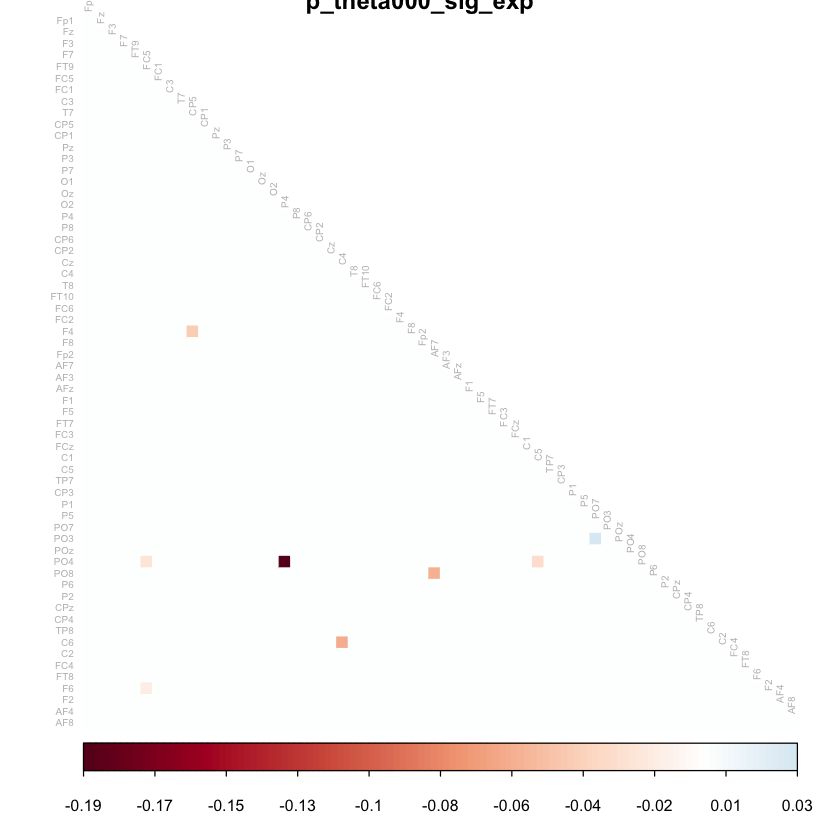

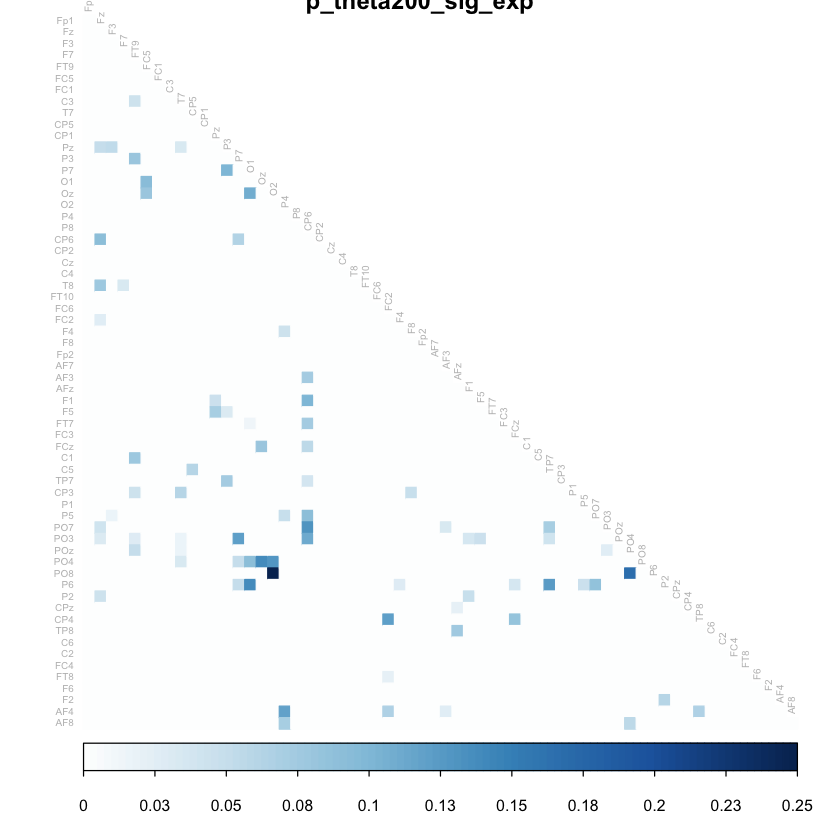

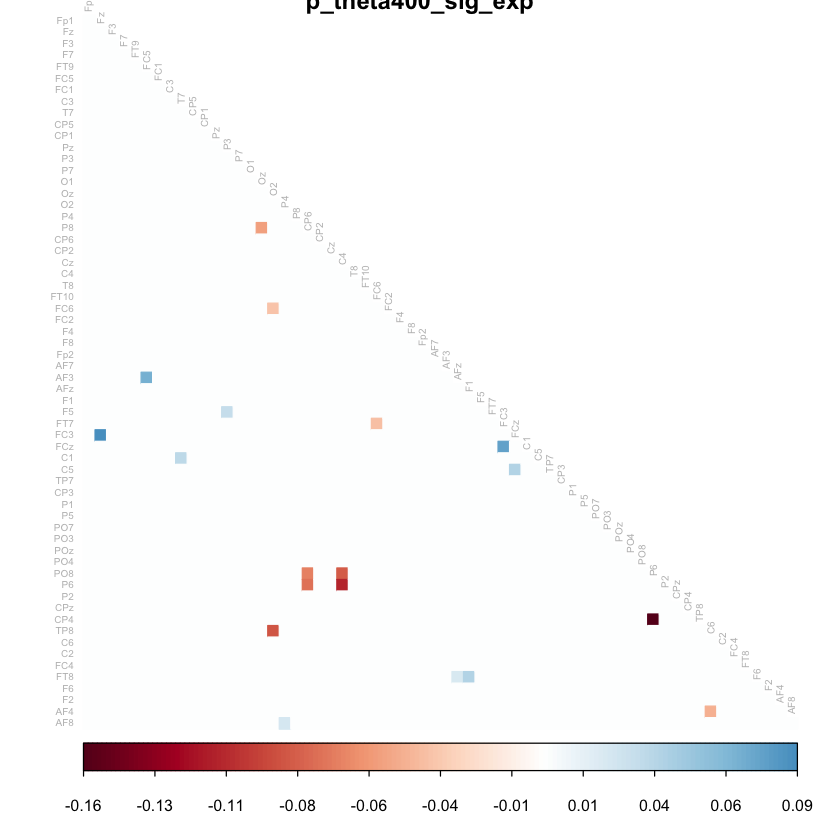

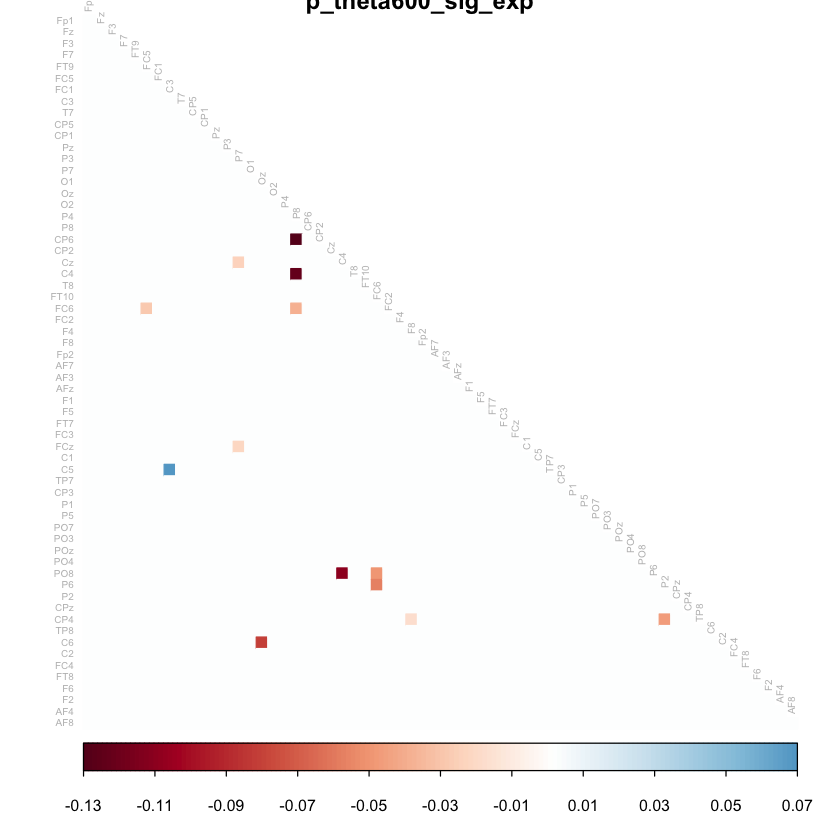

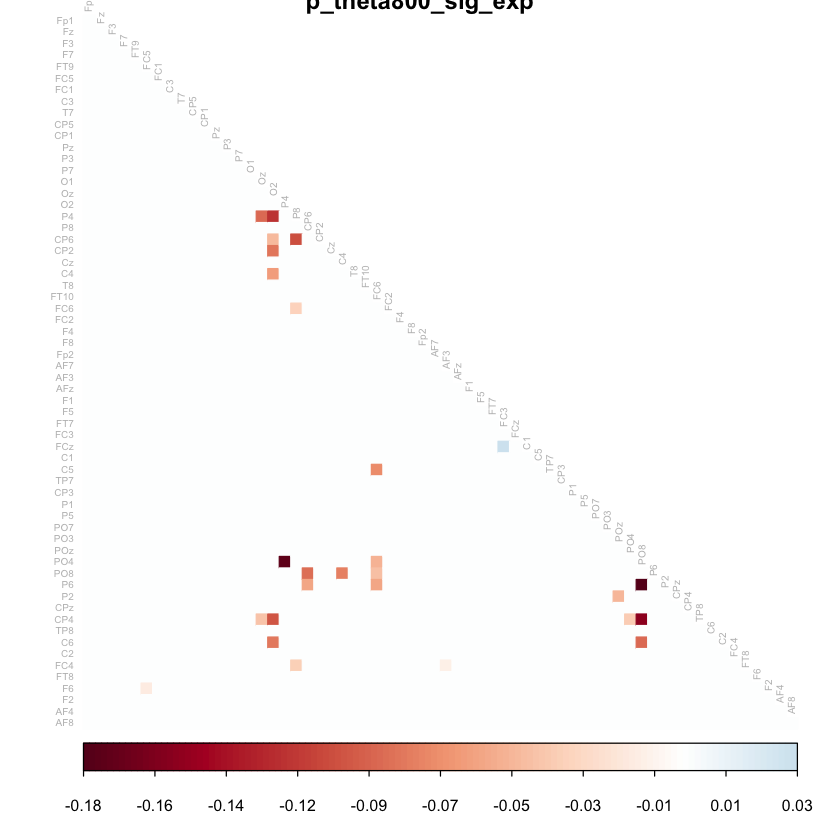

In [76]:
# p_theta000_sig_exp
rownames(p_theta000_sig_exp) = ch_names
colnames(p_theta000_sig_exp) = ch_names
corrplot(p_theta000_sig_exp, method="color", is.corr = FALSE, type="lower", tl.cex=0.5, tl.col="gray", main="p_theta000_sig_exp")

# p_theta200_sig_exp
rownames(p_theta200_sig_exp) = ch_names
colnames(p_theta200_sig_exp) = ch_names
corrplot(p_theta200_sig_exp, method="color", is.corr = FALSE, type="lower", tl.cex=0.5, tl.col="gray", main="p_theta200_sig_exp")

# p_theta400_sig_exp
rownames(p_theta400_sig_exp) = ch_names
colnames(p_theta400_sig_exp) = ch_names
corrplot(p_theta400_sig_exp, method="color", is.corr = FALSE, type="lower", tl.cex=0.5, tl.col="gray", main="p_theta400_sig_exp")

# p_theta600_sig_exp
rownames(p_theta600_sig_exp) = ch_names
colnames(p_theta600_sig_exp) = ch_names
corrplot(p_theta600_sig_exp, method="color", is.corr = FALSE, type="lower", tl.cex=0.5, tl.col="gray", main="p_theta600_sig_exp")

# p_theta800_sig_exp
rownames(p_theta800_sig_exp) = ch_names
colnames(p_theta800_sig_exp) = ch_names
corrplot(p_theta800_sig_exp, method="color", is.corr = FALSE, type="lower", tl.cex=0.5, tl.col="gray", main="p_theta800_sig_exp")

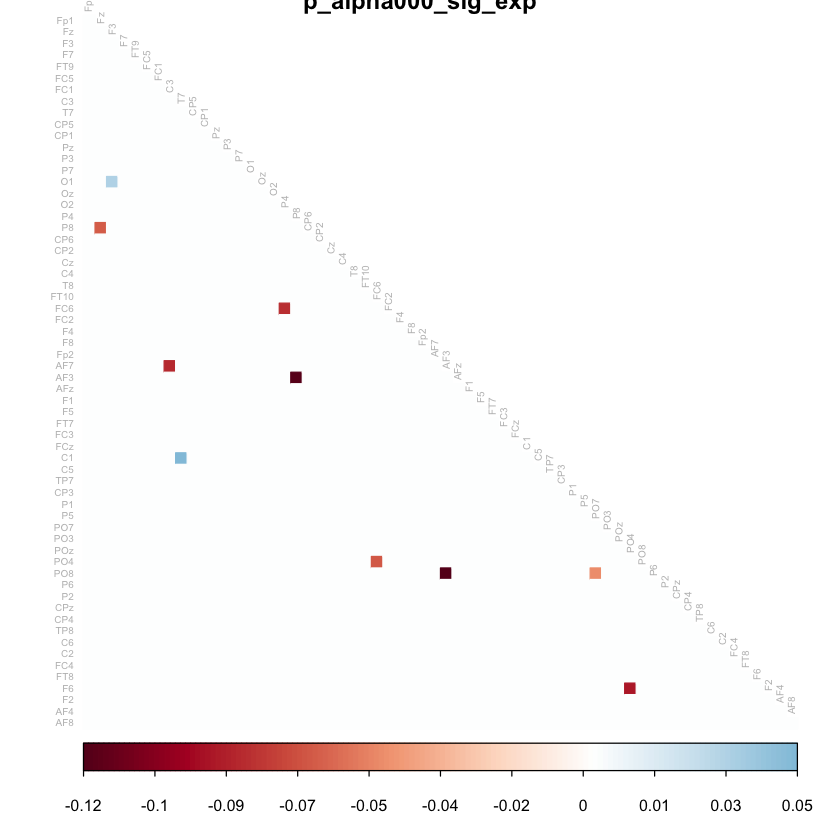

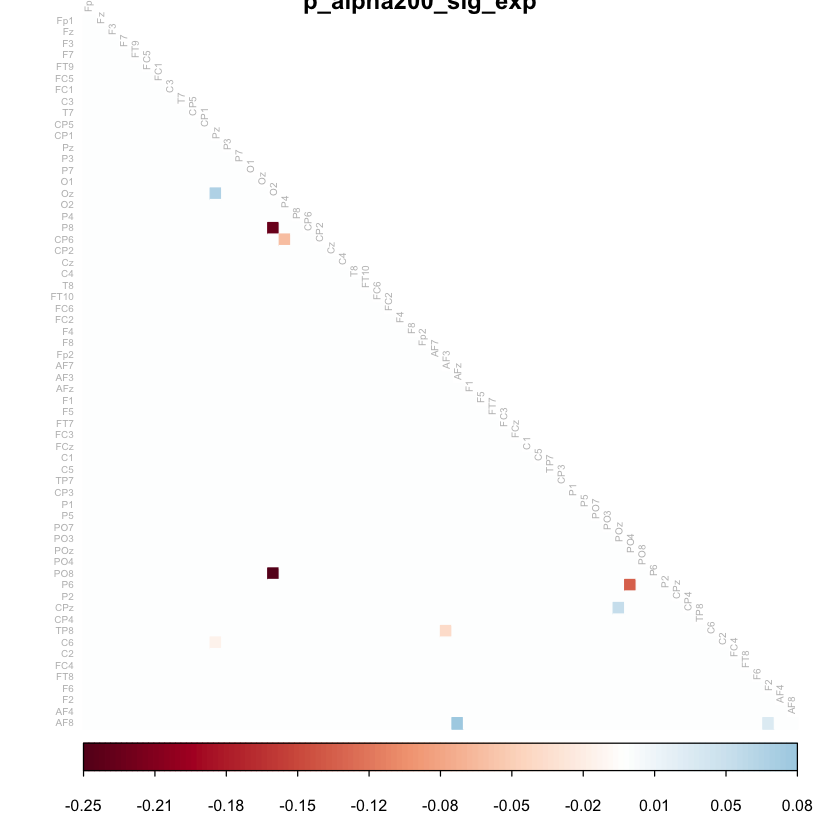

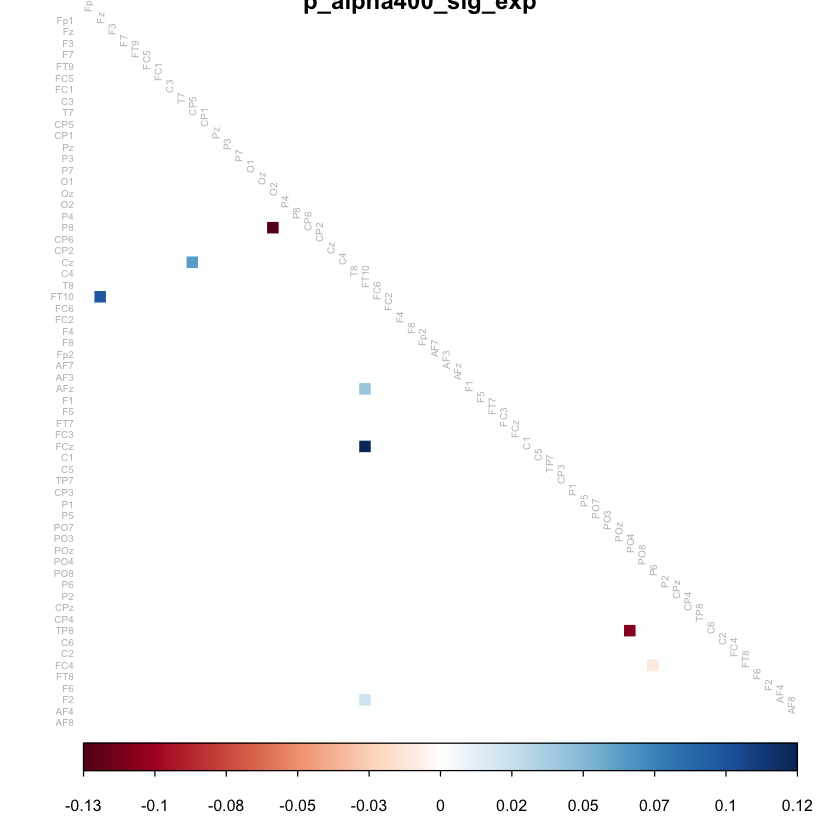

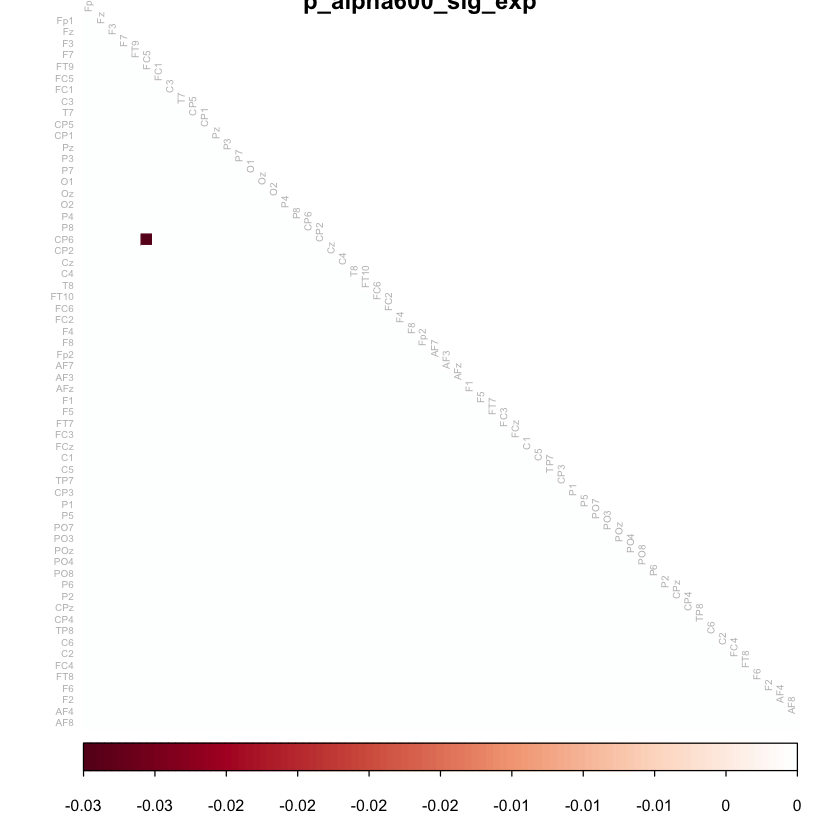

ERROR: Error in rownames(p_alpha000_sig_nov) = ch_names:  オブジェクト 'p_alpha000_sig_nov' がありません 


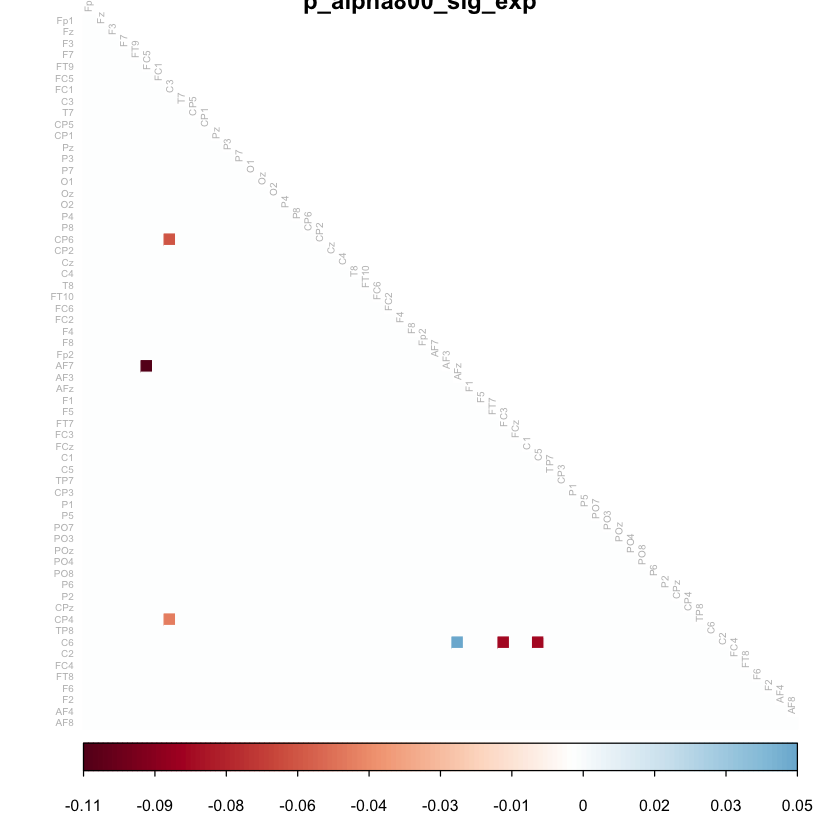

In [77]:
# p_alpha000_sig_exp
rownames(p_alpha000_sig_exp) = ch_names
colnames(p_alpha000_sig_exp) = ch_names
corrplot(p_alpha000_sig_exp, method="color", is.corr = FALSE, type="lower", tl.cex=0.5, tl.col="gray", main="p_alpha000_sig_exp")

# p_alpha200_sig_exp
rownames(p_alpha200_sig_exp) = ch_names
colnames(p_alpha200_sig_exp) = ch_names
corrplot(p_alpha200_sig_exp, method="color", is.corr = FALSE, type="lower", tl.cex=0.5, tl.col="gray", main="p_alpha200_sig_exp")

# p_alpha400_sig_exp
rownames(p_alpha400_sig_exp) = ch_names
colnames(p_alpha400_sig_exp) = ch_names
corrplot(p_alpha400_sig_exp, method="color", is.corr = FALSE, type="lower", tl.cex=0.5, tl.col="gray", main="p_alpha400_sig_exp")

# p_alpha600_sig_exp
rownames(p_alpha600_sig_exp) = ch_names
colnames(p_alpha600_sig_exp) = ch_names
corrplot(p_alpha600_sig_exp, method="color", is.corr = FALSE, type="lower", tl.cex=0.5, tl.col="gray", main="p_alpha600_sig_exp")

# p_alpha800_sig_exp
rownames(p_alpha800_sig_exp) = ch_names
colnames(p_alpha800_sig_exp) = ch_names
corrplot(p_alpha800_sig_exp, method="color", is.corr = FALSE, type="lower", tl.cex=0.5, tl.col="gray", main="p_alpha800_sig_exp")


# p_alpha000_sig_nov
rownames(p_alpha000_sig_nov) = ch_names
colnames(p_alpha000_sig_nov) = ch_names
corrplot(p_alpha000_sig_nov, method="color", is.corr = FALSE, type="lower", tl.cex=0.5, tl.col="gray", main="p_alpha000_sig_nov")

# p_alpha200_sig_nov
rownames(p_alpha200_sig_nov) = ch_names
colnames(p_alpha200_sig_nov) = ch_names
corrplot(p_alpha200_sig_nov, method="color", is.corr = FALSE, type="lower", tl.cex=0.5, tl.col="gray", main="p_alpha200_sig_nov")

# p_alpha400_sig_nov
rownames(p_alpha400_sig_nov) = ch_names
colnames(p_alpha400_sig_nov) = ch_names
corrplot(p_alpha400_sig_nov, method="color", is.corr = FALSE, type="lower", tl.cex=0.5, tl.col="gray", main="p_alpha400_sig_nov")

# p_alpha600_sig_nov
rownames(p_alpha600_sig_nov) = ch_names
colnames(p_alpha600_sig_nov) = ch_names
corrplot(p_alpha600_sig_nov, method="color", is.corr = FALSE, type="lower", tl.cex=0.5, tl.col="gray", main="p_alpha600_sig_nov")

# p_alpha800_sig_nov
rownames(p_alpha800_sig_nov) = ch_names
colnames(p_alpha800_sig_nov) = ch_names
corrplot(p_alpha800_sig_nov, method="color", is.corr = FALSE, type="lower", tl.cex=0.5, tl.col="gray", main="p_alpha800_sig_nov")

In [ ]:
# p_beta000_sig_exp
rownames(p_beta000_sig_exp) = ch_names
colnames(p_beta000_sig_exp) = ch_names
corrplot(p_beta000_sig_exp, method="color", is.corr = FALSE, type="lower", tl.cex=0.5, tl.col="gray", main="p_beta000_sig_exp")

# p_beta200_sig_exp
rownames(p_beta200_sig_exp) = ch_names
colnames(p_beta200_sig_exp) = ch_names
corrplot(p_beta200_sig_exp, method="color", is.corr = FALSE, type="lower", tl.cex=0.5, tl.col="gray", main="p_beta200_sig_exp")

# p_beta400_sig_exp
rownames(p_beta400_sig_exp) = ch_names
colnames(p_beta400_sig_exp) = ch_names
corrplot(p_beta400_sig_exp, method="color", is.corr = FALSE, type="lower", tl.cex=0.5, tl.col="gray", main="p_beta400_sig_exp")

# p_beta600_sig_exp
rownames(p_beta600_sig_exp) = ch_names
colnames(p_beta600_sig_exp) = ch_names
corrplot(p_beta600_sig_exp, method="color", is.corr = FALSE, type="lower", tl.cex=0.5, tl.col="gray", main="p_beta600_sig_exp")

# p_beta800_sig_exp
rownames(p_beta800_sig_exp) = ch_names
colnames(p_beta800_sig_exp) = ch_names
tmax(p_beta800_sig_exp, method="color", is.corr = FALSE, type="lower", tl.cex=0.5, tl.col="gray", main="p_beta800_sig_exp")


# p_beta000_sig_nov
rownames(p_beta000_sig_nov) = ch_names
colnames(p_beta000_sig_nov) = ch_names
corrplot(p_beta000_sig_nov, method="color", is.corr = FALSE, type="lower", tl.cex=0.5, tl.col="gray", main="p_beta000_sig_nov")

# p_beta200_sig_nov
rownames(p_beta200_sig_nov) = ch_names
colnames(p_beta200_sig_nov) = ch_names
corrplot(p_beta200_sig_nov, method="color", is.corr = FALSE, type="lower", tl.cex=0.5, tl.col="gray", main="p_beta200_sig_nov")

# p_beta400_sig_nov
rownames(p_beta400_sig_nov) = ch_names
colnames(p_beta400_sig_nov) = ch_names
corrplot(p_beta400_sig_nov, method="color", is.corr = FALSE, type="lower", tl.cex=0.5, tl.col="gray", main="p_beta400_sig_nov")

# p_beta600_sig_nov
rownames(p_beta600_sig_nov) = ch_names
colnames(p_beta600_sig_nov) = ch_names
corrplot(p_beta600_sig_nov, method="color", is.corr = FALSE, type="lower", tl.cex=0.5, tl.col="gray", main="p_beta600_sig_nov")

# p_beta800_sig_nov
rownames(p_beta800_sig_nov) = ch_names
colnames(p_beta800_sig_nov) = ch_names
corrplot(p_beta800_sig_nov, method="color", is.corr = FALSE, type="lower", tl.cex=0.5, tl.col="gray", main="p_beta800_sig_nov")